# Inaugural project

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from scipy.optimize import minimize

plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
from ExchangeEconomy import ExchangeEconomyClass

In [16]:
model = ExchangeEconomyClass()

## Question 1: pareto improvements

In [17]:
par = model.par

In [18]:
N = 75
grid_x1A = np.linspace(0.0,1.0,N)
grid_x2A = np.linspace(0.0,1.0,N)

In [19]:
# check the utility under the intial endowment

print(f'The initial utility A is {model.utility_A(model.par.w1A, model.par.w2A)}.')
print(f'The initial utility B is {model.utility_B((1-model.par.w1A), (1-model.par.w2A))}.')

The initial utility A is 0.41601676461038084.
The initial utility B is 0.30365889718756617.


In [20]:
# create grids for utility values
N = 75
utility_gridA = np.zeros((N, N))  # create a grid for utility values
utility_gridB = np.zeros((N, N))
grid_x1A = np.linspace(0.0, 1.0, N)
grid_x2A = np.linspace(0.0, 1.0, N)

# create a meshgrid of x1A and x2A values
X1A, X2A = np.meshgrid(grid_x1A, grid_x2A)


# compute utility for each combination of x1A and x2A
for i in range(N):
    for j in range(N):
        utility_gridA[i, j] = model.utility_A(X1A[i, j], X2A[i, j])
        utility_gridB[i, j] = model.utility_B((1 - X1A[i, j]), (1 - X2A[i, j]))


In [21]:
# compute utility of the initial endowment
initial_utilityA = model.utility_A(par.w1A, par.w2A)
initial_utilityB = model.utility_B((1 - par.w1A), (1 - par.w2A))

# create set C: checking for pareto improvements
C_Grid = ((utility_gridA >= initial_utilityA) & (utility_gridB >= initial_utilityB)).astype(int)


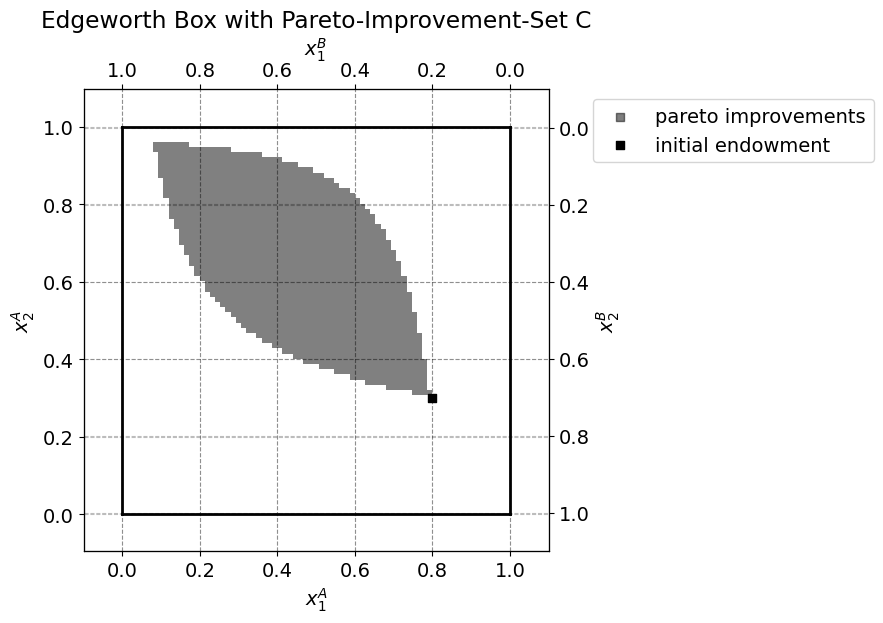

In [22]:
# plot the Edgeworth box and the pareto improvements (C_Grid)
w1bar = 1.0
w2bar = 1.0
fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# plot the binary grid (C_Grid)
ax_A.imshow(C_Grid, extent=[0, w1bar, 0, w2bar], origin='lower', cmap='binary', alpha=0.5)
ax_A.scatter([], [], marker='s', color='black', alpha=0.5, label='pareto improvements')

# marker for the initial endowment
ax_A.scatter(par.w1A, par.w2A, marker='s', color='black', label='initial endowment')

# limits
ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.72, 1.0))
plt.title('Edgeworth Box with Pareto-Improvement-Set C')
plt.show()


## Question 2: error in market clearing

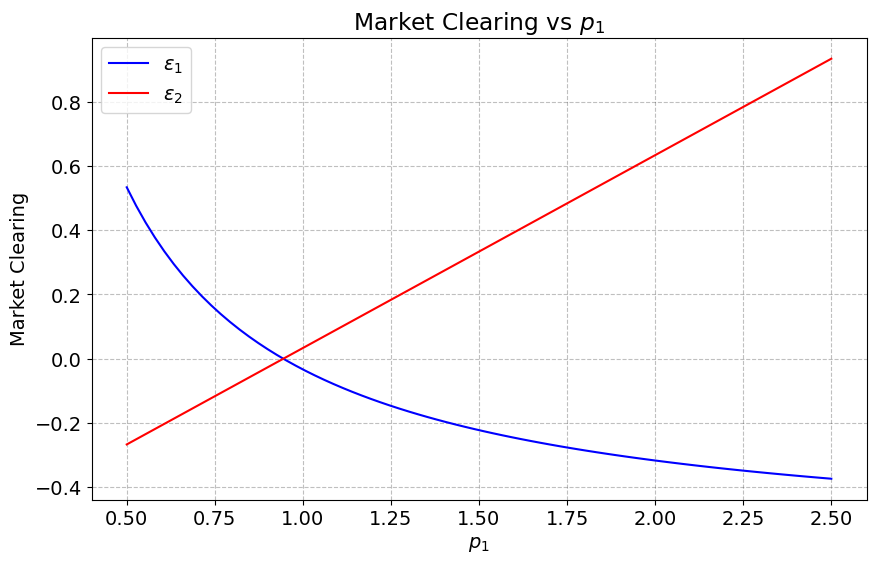

In [23]:
pN = 100  # Number of grid points (N)
p1_grid = np.zeros(76)

for i in range(76):
    p1_grid[i] = 0.5 + 2 * i / 75

grid_mkt_clearing = np.zeros((pN, 2))  # Creating a 2D array to store eps1 and eps2

for index, value in enumerate(p1_grid):
    eps1, eps2 = model.check_market_clearing(value)
    grid_mkt_clearing[index] = eps1, eps2  # Storing eps1 and eps2 separately
    # print(f'error in market clearing condition for p1={value}: eps1={eps1:12.8f}, eps2={eps2:12.8f}')

plt.figure(figsize=(10, 6))
plt.plot(p1_grid[:76], grid_mkt_clearing[:76, 0], label='$\epsilon_1$', color='blue')
plt.plot(p1_grid[:76], grid_mkt_clearing[:76, 1], label='$\epsilon_2$', color='red')
plt.xlabel('$p_1$')
plt.ylabel('Market Clearing')
plt.legend()
plt.title('Market Clearing vs $p_1$')
plt.show()

As the list of the calculated errors is too extensive, so they are only plotted.

## Question 3: market clearing price

We minimise an objective function to find the market clearing price

Optimal price p1: 0.9444441738254861
Market clearing errors at optimal price: epsilon1=1.7192268153554124e-07, epsilon2=-1.6237137490104914e-07


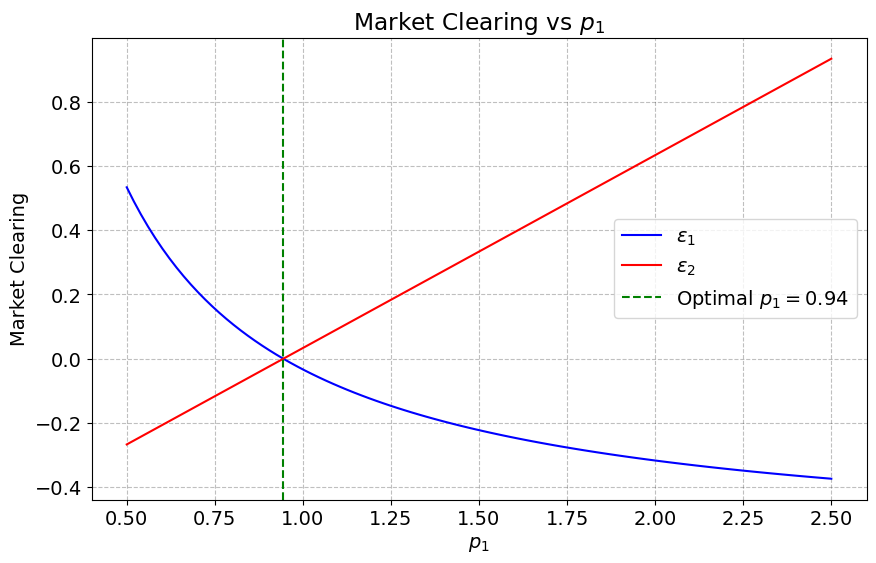

In [24]:
# Initialize the model
model = ExchangeEconomyClass()

# Define the objective function
def objective_function(p1, model):
    eps1, eps2 = model.check_market_clearing(p1)
    return (eps1**2 + eps2**2)

# Use a numerical solver to minimize the objective function
initial_guess = 1.0  # Initial guess for the price p1
result = minimize(objective_function, initial_guess, args=(model,), method='BFGS')

# Extract the optimal price and corresponding epsilon values
optimal_p1 = result.x[0]
optimal_eps1, optimal_eps2 = model.check_market_clearing(optimal_p1)

print(f'Optimal price p1: {optimal_p1}')
print(f'Market clearing errors at optimal price: epsilon1={optimal_eps1}, epsilon2={optimal_eps2}')

# Visualize the results
p1_grid = np.linspace(0.5, 2.5, 100)
grid_mkt_clearing = np.zeros((100, 2))

for index, value in enumerate(p1_grid):
    eps1, eps2 = model.check_market_clearing(value)
    grid_mkt_clearing[index] = eps1, eps2

plt.figure(figsize=(10, 6))
plt.plot(p1_grid, grid_mkt_clearing[:, 0], label='$\\epsilon_1$', color='blue')
plt.plot(p1_grid, grid_mkt_clearing[:, 1], label='$\\epsilon_2$', color='red')
plt.axvline(optimal_p1, color='green', linestyle='--', label=f'Optimal $p_1={optimal_p1:.2f}$')
plt.xlabel('$p_1$')
plt.ylabel('Market Clearing')
plt.legend()
plt.title('Market Clearing vs $p_1$')
plt.show()


## Question 4a

It seems that we need to constrain the problem so that $x_1^B = 1 - x_1^A$ and $x_2^B = 1 - x_2^A$, like in set C. 

Notice that at the lower bound of 0.5, there is negative $x_1^A$. So, the lower bound is adjusted slightly higher to 0.54, to ensure the optimiser does not find a corner solution.

In [25]:
pN = 100
p1_grid = np.linspace(0.54, 2.5, pN) # change lower bound slightly for positive consumption
grid_mkt = np.zeros(pN)  # creating a 2D array to store utility values

for index, value in enumerate(p1_grid):
    # compute utility for each p value
    x1B, x2B = model.demand_B(value)
    utility = model.utility_A(x1A=1-x1B, x2A=1-x2B)
    grid_mkt[index] = utility  # storing utility 


# check if there are any NaN values
if np.isnan(grid_mkt).any():
    print("There are NaN values in utility.")
else:
    # print the maximum utility value
    print(f'The maximum utility is {np.max(grid_mkt)}.')


The maximum utility is 0.6336195017320458.


In [26]:
pN = 1000
p1_grid = np.linspace(0.54, 2.5, pN) # change lower bound slightly for positive consumption
grid_mkt = np.zeros(pN)  # creating a 2D array to store utility values

for index, value in enumerate(p1_grid):
    # compute utility for each p value
    x1B, x2B = model.demand_B(value)
    utility = model.utility_A(x1A=1-x1B, x2A=1-x2B)
    grid_mkt[index] = utility  # Storing utility 

# print the utility values
# print("Utility values:")
# print(grid_mkt)

# check if there are any NaN values
if np.isnan(grid_mkt).any():
    print("There are NaN values in utility.")
else:
    # Print the maximum utility value
    max_utility = np.max(grid_mkt)
    print(f'The maximum utility is {max_utility}.')

    # Find the index of the maximum utility value
    max_utility_index = np.argmax(grid_mkt)

    # Get the corresponding price
    optimal_p = p1_grid[max_utility_index]

    # Compute the allocations of x1A, x2A, x1B, and x2B
    x1B, x2B = model.demand_B(optimal_p)
    x1A = 1 - x1B
    x2A = 1 - x2B

    # Print the results
    print(f'Optimal price: {optimal_p}')
    print(f'Optimal utility level: {max_utility}')
    print(f'Allocation of x1A: {x1A}')
    print(f'Allocation of x2A: {x2A}')
    print(f'Allocation of x1B: {x1B}')
    print(f'Allocation of x2B: {x2B}')

    # Save allocation for later plot
    p1_set_optimal = (x1A, x2A)


The maximum utility is 0.6336208481089944.
Optimal price: 1.8996396396396396
Optimal utility level: 0.6336208481089944
Allocation of x1A: 0.6210060387618956
Allocation of x2A: 0.640024024024024
Allocation of x1B: 0.3789939612381043
Allocation of x2B: 0.359975975975976


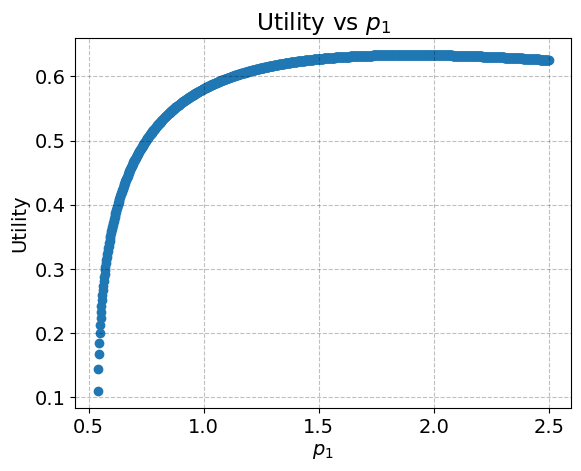

In [27]:
# plot the utility values
plt.scatter(p1_grid, grid_mkt)
plt.xlabel('$p_1$')
plt.ylabel('Utility')
plt.title('Utility vs $p_1$')
plt.grid(True)
plt.show()

## Question 4b: analytic solution

This problem needs to be constrained to ensure strictly non-negative consumption and utility. Using the bounds $p_1 \in [0,5]$ gives (approximately) the same maximum as in 4a. 

In [28]:
from scipy.optimize import minimize_scalar

# define the objective function to maximize (utility function)

def objective_function(p):
    # compute the utility for a given p value
    if model.demand_B(p)[0] > 1 and model.demand_B(p)[1] > 1:
        print(f'problem')
    else:
        utility = model.utility_A(1 - model.demand_B(p)[0], 1 - model.demand_B(p)[1])
    return -utility  # we use negative utility because minimize_scalar minimizes by default

# Perform scalar optimization to find the optimal p value
result = minimize_scalar(objective_function, bounds=(0, 5), method='bounded')

# Get the optimal p value
optimal_p = result.x
optimal_utility = -result.fun  # Utility is negative because we used -utility in the objective function

print(f'The optimal p value for maximum utility is {optimal_p}.')
print(f'The maximum utility is {optimal_utility}.')


The optimal p value for maximum utility is 1.8993456159390096.
The maximum utility is 0.6336208506936474.


In [29]:
# compute the allocation of x1A, x2A, x1B, and x2B for the optimal p value
x1A = 1 - model.demand_B(optimal_p)[0]
x2A = 1 - model.demand_B(optimal_p)[1]
x1B = model.demand_B(optimal_p)[0]
x2B = model.demand_B(optimal_p)[1]

print(f'Allocation of x1A: {x1A}')
print(f'Allocation of x2A: {x2A}')
print(f'Allocation of x1B: {x1B}')
print(f'Allocation of x2B: {x2B}')

# save allocation for a later plot
positive_price_analytic_optimal = (x1A, x2A)

Allocation of x1A: 0.6209680098500909
Allocation of x2A: 0.640043625604066
Allocation of x1B: 0.3790319901499091
Allocation of x2B: 0.3599563743959339


## Question 5a

In [30]:
# Initialize the model
model = ExchangeEconomyClass()

# Define the grid C
N = 75
xA1_values = np.linspace(0, 1, N+1)
xA2_values = np.linspace(0, 1, N+1)
C_grid = np.meshgrid(xA1_values, xA2_values)

# Create an empty list to store the utility values
utility_values = []

# Iterate through the grid and calculate utility
for xA1, xA2 in zip(C_grid[0].flatten(), C_grid[1].flatten()):
    if model.utility_A(xA1, xA2) >= model.utility_A(0.8, 0.3) and model.utility_B(1 - xA1, 1 - xA2) >= model.utility_B(0.2, 0.7):
        utility_values.append((model.utility_A(xA1, xA2), xA1, xA2))

# Find the allocation that maximizes uA
max_utility = max(utility_values, key=lambda x: x[0])
max_uA, max_xA1, max_xA2 = max_utility

# Calculate the corresponding allocations for B
max_xB1 = 1 - max_xA1
max_xB2 = 1 - max_xA2

print(f'Maximum utility A with respect to pareto improvements: {max_uA}')
print(f'Corresponding x1A: {max_xA1}')
print(f'Corresponding x2A: {max_xA2}')
print(f'Corresponding x1B: {max_xB1}')
print(f'Corresponding x2B: {max_xB2}')

#save for later plot
Pareto_grid_optimal = (max_xA1, max_xA2)


Maximum utility A with respect to pareto improvements: 0.7415523509091093
Corresponding x1A: 0.56
Corresponding x2A: 0.8533333333333334
Corresponding x1B: 0.43999999999999995
Corresponding x2B: 0.1466666666666666


## Question 5b

In [31]:
from scipy.optimize import minimize
# Define the objective function to maximize utility for agent A
def objective_function(x):
    x1A, x2A = x
    utility_A = model.utility_A(x1A, x2A)
    return -utility_A  # We use negative utility because we are maximizing

# Define the constraint function
def constraint_function(x):
    x1A, x2A = x
    traded_utility_B = model.utility_B(1 - x1A, 1 - x2A)
    endowment_utility_B = model.utility_B(1-par.w1A, 1-par.w2A)
    constraint_value = traded_utility_B - endowment_utility_B
    return constraint_value

# Define bounds for x1A and x2A (between 0 and 1)
bounds = [(0, 1), (0, 1)]

# Initial guess for x1A and x2A
initial_guess = [0.1, 0.5]

# Perform constrained optimization to find the optimal x1A and x2A values
result = minimize(objective_function, x0=initial_guess, bounds=bounds, constraints={'type': 'ineq', 'fun': constraint_function}, method='SLSQP')

# Get the optimal x1A and x2A values
optimal_x1A, optimal_x2A = result.x
optimal_utility = -result.fun  # Utility is negative because we used -utility in the objective function

print(f'Optimal x1A value for maximum utility: {optimal_x1A}')
print(f'Optimal x2A value for maximum utility: {optimal_x2A}')
print(f'Maximum utility: {optimal_utility}')

#save for later plot
Pareto_analytic_optimal = (optimal_x1A, optimal_x2A)


Optimal x1A value for maximum utility: 0.5757452162733269
Optimal x2A value for maximum utility: 0.8444376376366814
Maximum utility: 0.7432276088828156


## Question 6a: utilitarianism

In [32]:
from scipy.optimize import minimize
# define the objective function to maximize aggregate utility
def objective_function(x):
    x1A, x2A = x
    utility_A = model.utility_A(x1A, x2A) + model.utility_B(1 - x1A, 1 - x2A)
    return -utility_A  # we use negative utility because we are maximizing


# define bounds for x1A and x2A (between 0 and 1)
bounds = [(0, 1), (0, 1)]

# initial guess for x1A and x2A
initial_guess = [0.5, 0.5]

# perform constrained optimization to find the optimal x1A and x2A values
result = minimize(objective_function, x0=initial_guess, bounds=bounds, method='SLSQP')

# get the optimal x1A and x2A values
optimal_x1A, optimal_x2A = result.x
optimal_utility = -result.fun  # utility is negative because we used -utility in the objective function

print(f'Optimal x1A value for maximum utility: {optimal_x1A}')
print(f'Optimal x2A value for maximum utility: {optimal_x2A}')
print(f'Optimal x1B value for maximum utility: {1-optimal_x1A}')
print(f'Optimal x2B value for maximum utility: {1-optimal_x2A}')

print(f'Maximum aggregate utility: {optimal_utility}')

# save for later plot
utilitarian_optimal = (optimal_x1A, optimal_x2A)


Optimal x1A value for maximum utility: 0.3334116578920504
Optimal x2A value for maximum utility: 0.666588310103883
Optimal x1B value for maximum utility: 0.6665883421079496
Optimal x2B value for maximum utility: 0.333411689896117
Maximum aggregate utility: 1.058267353366544


## Question 6b: qualitative comparisons

The various allocations are presented in the plot below.

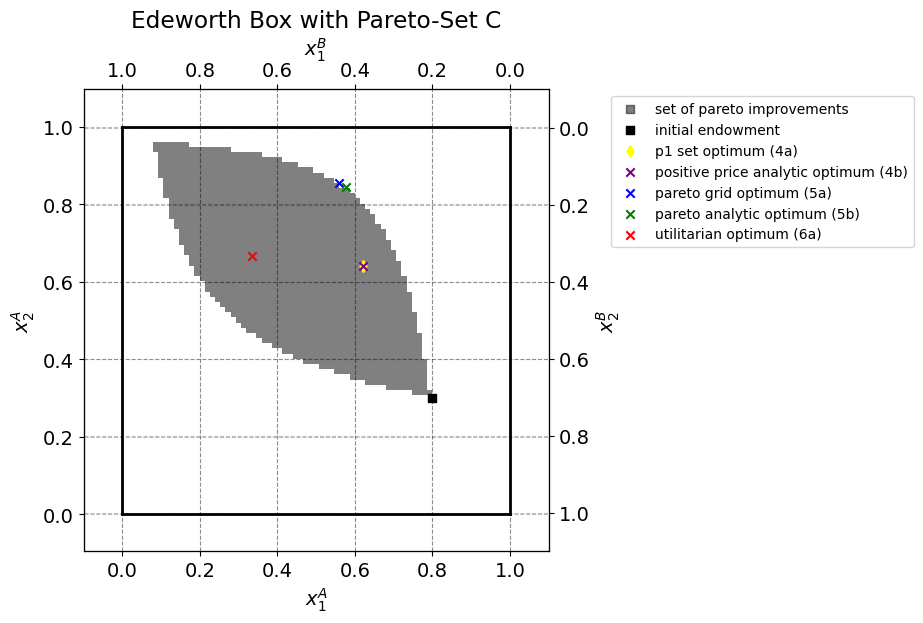

In [33]:
# plot the Edgeworth box across different allocations
w1bar = 1.0
w2bar = 1.0
fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# plot the binary grid C_Grid
ax_A.imshow(C_Grid, extent=[0, w1bar, 0, w2bar], origin='lower', cmap='binary', alpha=0.5)
ax_A.scatter([], [], marker='s', color='black', alpha=0.5, label='set of pareto improvements')

# show the endowment and various allocations
ax_A.scatter(par.w1A, par.w2A, marker='s', color='black', label='initial endowment')
ax_A.scatter(p1_set_optimal[0], p1_set_optimal[1], marker='d', color='yellow', label='p1 set optimum (4a)')
ax_A.scatter(positive_price_analytic_optimal[0], positive_price_analytic_optimal[1], marker='x', color='purple',
             label='positive price analytic optimum (4b)')
ax_A.scatter(Pareto_grid_optimal[0], Pareto_grid_optimal[1], marker='x', color='blue', label='pareto grid optimum (5a)')
ax_A.scatter(Pareto_analytic_optimal[0], Pareto_analytic_optimal[1], marker='x', color='green',
             label='pareto analytic optimum (5b)')
ax_A.scatter(utilitarian_optimal[0], utilitarian_optimal[1], marker='x', color='red', label='utilitarian optimum (6a)')

# limits
ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True, fontsize=10, loc='upper right', bbox_to_anchor=(1.8, 1.0))
plt.title('Edeworth Box with Pareto-Set C')
plt.show()

### Qualitative Analysis of Different Allocations in the Edgeworth Box

#### Observations from the Plot

1. **Market Clearing Allocation (Question 3)**
    - **Pros:**
        - This allocation ensures that both goods' markets clear. It represents an equilibrium state where the supply equals demand for both goods.
        - Typically falls on the contract curve, ensuring efficient allocation of resources.
    - **Cons:**
        - It might not maximize the individual utility for both agents, as market-clearing conditions don't necessarily consider individual preferences.
        - If the initial endowments are significantly unequal, this allocation might still reflect those inequalities.

2. **Utility Maximization for A with Discrete Prices (Question 4a)**
    - **Pros:**
        - This allocation allows agent A to maximize their utility given a set of discrete prices.
        - The plot might show this allocation as a point where agent A's utility is at its highest within the set price constraints.
    - **Cons:**
        - Discrete price choices limit the flexibility and might not allow agent A to achieve the absolute highest utility.
        - The resulting allocation might leave agent B worse off compared to the initial endowment or other allocations.

3. **Utility Maximization for A with Any Positive Price (Question 4b)**
    - **Pros:**
        - Provides more flexibility, allowing agent A to maximize their utility without discrete constraints.
        - Likely seen in the plot as an allocation where agent A’s utility contour is at a peak.
    - **Cons:**
        - If agent B’s welfare is not constrained, this could result in highly unequal outcomes.
        - May not be a Pareto improvement if agent B’s utility is significantly lowered.

4. **Pareto Improvements Allocation (Question 5a)**
    - **Pros:**
        - Ensures that both agents are at least as well off as their initial endowments.
        - The plot should show this allocation as points where both agents’ utility contours intersect, indicating mutual improvement.
    - **Cons:**
        - While equitable, it may not maximize utility for either agent individually.
        - Constrained by the need to improve both agents’ welfare, which might limit potential utility gains.

5. **Unconstrained Utility Maximization for A (Question 5b)**
    - **Pros:**
        - Seeks the highest utility for agent A without additional constraints.
        - In the plot, this might be the highest point on agent A’s utility contour.
    - **Cons:**
        - Can result in significant welfare loss for agent B unless constraints are added to protect B’s initial utility.
        - May not be a fair allocation as it focuses solely on one agent’s utility.

6. **Utilitarian Social Planner Allocation (Question 6a)**
    - **Pros:**
        - Aims to maximize the total utility of both agents, leading to a potentially optimal societal outcome.
        - Should be seen on the plot where the combined utility contours (sum of individual utilities) are optimized.
    - **Cons:**
        - Individual utilities might not be maximized, as the focus is on the sum of utilities.
        - Requires complete information and a benevolent planner, which might not always be realistic.




## Question 7: uniform distribution

In [34]:
# generate random endowments

np.random.seed(79) # for reproductivity
num_elements = 50
W = np.random.uniform(0, 1, size=(num_elements, 2))

# print(W)
print(len(W))

50


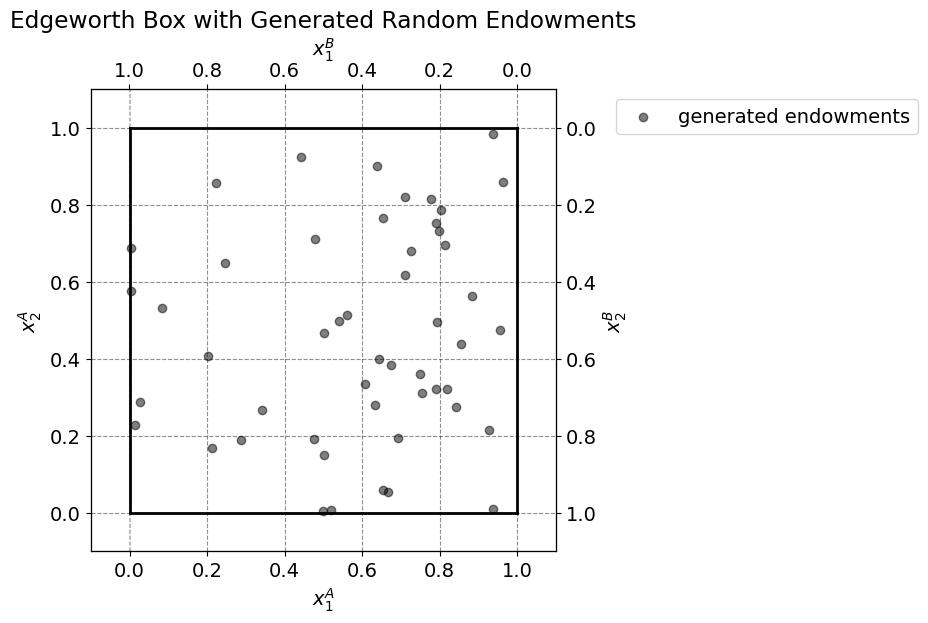

In [35]:
# plot the Edgeworth box
w1bar = 1.0
w2bar = 1.0
fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# plot the generated random endowments
x_values = W[:, 0]
y_values = W[:, 1]
ax_A.scatter(x_values, y_values, color='black', alpha=0.5, label='generated endowments')

# limits
ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.8, 1.0))
plt.title('Edgeworth Box with Generated Random Endowments')
plt.show()


## Question 8: market equilibrium
I think they want us to loop through all the endowments, then check if there is market clearing...

In [36]:
# demand functions
# re-defining the demand function, as endowment i is random now
def xA1_star(p1, omegaA1, omegaA2):
    return par.alpha * (p1 * omegaA1 + omegaA2) / p1

def xA2_star(p1, omegaA1, omegaA2):
    return (1 - par.alpha) * (p1*omegaA1 + omegaA2) 

def xB1_star(p1, omegaA1, omegaA2):
    return par.beta * ((1 - p1)*omegaA1 + omegaA2)

def xB2_star(p1, omegaA1, omegaA2):
    return (1 - par.beta) * ((1 - p1)*omegaA1 + omegaA2)


# function to calculate market clearing errors
# the function is now modified to take the endowment space into account
def market_clearing_error(p1, omegaA1, omegaA2):
    error1 = xA1_star(p1, omegaA1, omegaA2) - omegaA1 - xB1_star(p1, 1-omegaA1, 1-omegaA2)
    error2 = xA2_star(p1, omegaA1, omegaA2) - omegaA2 - xB2_star(p1, 1-omegaA1, 1-omegaA2)
    return abs(error1) + abs(error2)

# function to find market clearing price
# the market error function is minimized to find the market clearing price
# the used method is L-BFGS-B, a bounded method with the constraint that the price should be positive
def market_clearing_price(omegaA1, omegaA2):
    result = minimize(market_clearing_error, x0=0.5, args=(omegaA1, omegaA2), bounds=[(0, None)], method='L-BFGS-B')
    if result.success:
        return result.x[0]
    return None

/var/folders/tc/pvnpw4751lg6s93g7n8s7v080000gn/T/ipykernel_39470/3731047577.py:4: RuntimeWarning: divide by zero encountered in divide
  return par.alpha * (p1 * omegaA1 + omegaA2) / p1


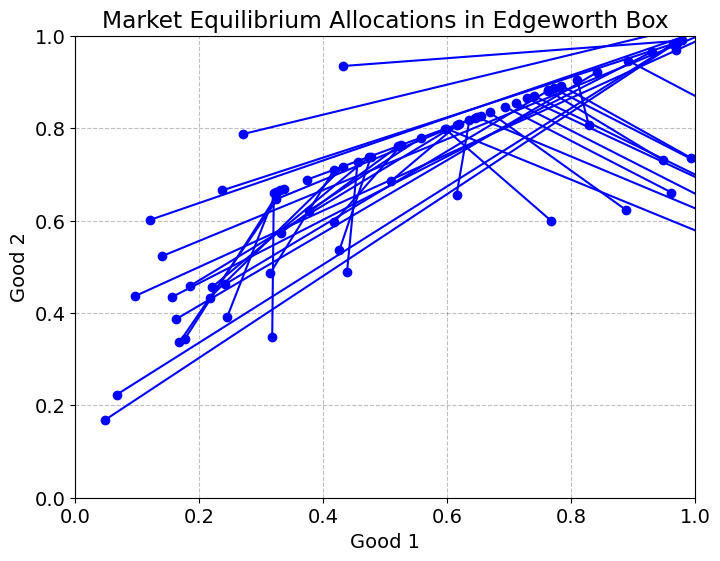

In [37]:

# find market equilibrium allocation for each omegaA in W and plot in Edgeworth box
plt.figure(figsize=(8, 6))
plt.title('Market Equilibrium Allocations in Edgeworth Box')

for omegaA in W:
    p1_eq = market_clearing_price(omegaA[0], omegaA[1]) # omegaA[0] is omegaA1 and omegaA[1] is omegaA2 it is based on W
    if p1_eq is not None:
        xA1_eq = xA1_star(p1_eq, omegaA[0], omegaA[1]) # calculates the optimal allocation of agent A of good 1
        xA2_eq = xA2_star(p1_eq, omegaA[0], omegaA[1]) # calculates the optimal allocation of agent A of good 2
        xB1_eq = xB1_star(p1_eq, 1-omegaA[0], 1-omegaA[1])
        xB2_eq = xB2_star(p1_eq, 1-omegaA[0], 1-omegaA[1])
    
        plt.plot([xA1_eq, 1-xB1_eq], [xA2_eq, 1-xB2_eq], 'bo-') # plots the consumption bundels and connects
                                                                # them with a blue line


plt.xlabel('Good 1')
plt.ylabel('Good 2')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
# plt.legend()
plt.show()

/var/folders/tc/pvnpw4751lg6s93g7n8s7v080000gn/T/ipykernel_39470/3731047577.py:4: RuntimeWarning: divide by zero encountered in divide
  return par.alpha * (p1 * omegaA1 + omegaA2) / p1


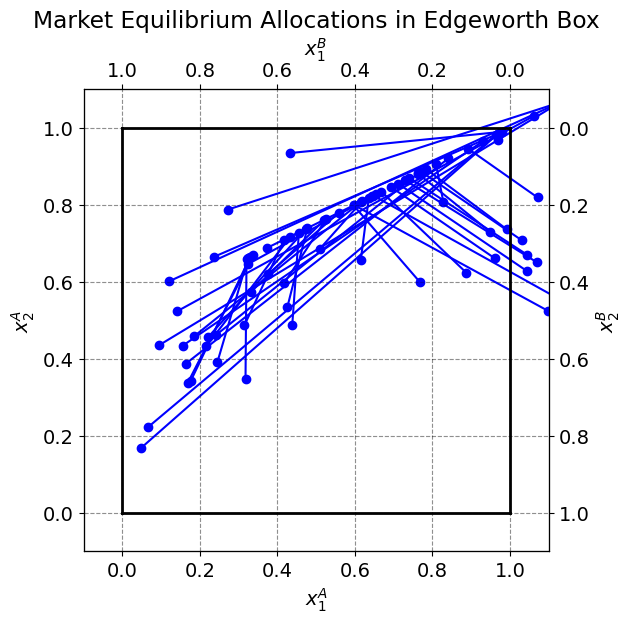

In [38]:
# plot the Edgeworth box
w1bar = 1.0
w2bar = 1.0
fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# plot the generated random endowments
for omegaA in W:
    p1_eq = market_clearing_price(omegaA[0], omegaA[1]) # omegaA[0] is omegaA1 and omegaA[1] is omegaA2 it is based on W
    if p1_eq is not None:
        xA1_eq = xA1_star(p1_eq, omegaA[0], omegaA[1]) # calculates the optimal allocation of agent A of good 1
        xA2_eq = xA2_star(p1_eq, omegaA[0], omegaA[1]) # calculates the optimal allocation of agent A of good 2
        xB1_eq = xB1_star(p1_eq, 1-omegaA[0], 1-omegaA[1])
        xB2_eq = xB2_star(p1_eq, 1-omegaA[0], 1-omegaA[1])

        # plot the consumption bundels and connect them with blue lines
        ax_A.plot([xA1_eq, 1-xB1_eq], [xA2_eq, 1-xB2_eq], 'bo-', label='consumption bundles')
        

# limits
ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])


# ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.8, 1.0))
plt.title('Market Equilibrium Allocations in Edgeworth Box')
plt.show()
